Run the cell below if you need to install the `mplEasyAnimate` package. The [mplEasyAnimate](https://github.com/tboudreaux/mpl_animate) package was created by HPU alumnus Thomas Boudreaux.

In [ ]:
!pip install mplEasyAnimate

# Random Walk

See Module 9.5 in *Introduction to Computational Science* by Shiflet and Shiflet.

Many physical processes are a result of an object traveling in a medium through random collisions with molecules or atoms in the medium. Examples include a pollen particle in a fluid, calcium traveling through a bone, or a photon generated in the interior of the sun traveling to the surface. One way to simulate this process is a *random walk*.

In this notebook, you will:

1. create a 3D visualization of a grid and object using the package `vpython`.
2. randomly select steps for the object.
3. visualize the path of the object.
4. calculate the distance traveled from its starting location.

## Introduction

A simulation composed of a grid with cells (or sites) where each cell has a state and follows rules is called a *cellular automaton*. (The plural describing multiple such simulations is *cellular automata*.)

In a random walk, the object in one time step randomly moves diagonally one cell in one of the following directions:

- NE
- NW
- SW
- SE

(This is for a two-dimensional grid.) 

Let's define a Cartesian coordinate system with $+x$ to the right and $+y$. An object can only be at a location on the grid given by integers $(x,y)$. Each location will be called a *cell*. In other words, the location of the object given by the coordinate pair could be something like $(0,1)$ or $(-10,15)$ but not $(3.5,1)$.  A movement from cell to another is called a *displacement*.

- A step to the right is $\Delta x = +1$.
- A step to the left is $\Delta x = -1$.
- A step upward is $\Delta y = +1$.
- A step downward is $\Delta y = -1$.

In a single step, the object can only have a displacement diagonally. In two dimensions, the possible displacements are:

- NE: $<1,1,0>$
- NW: $<-1,1,0>$
- SE: $<1,-1,0>$
- SW: $<-1,-1,0>$

In the rest of the notebook, we will create a grid, move an object randomly along one of these four directions, and examine its motion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

## Random Walk

A particle starts at $(0,0)$. It randomly travels diagonally NE, SE, NW, or SW. 

- Randomly pick 0 or 1 and use this to step right or left.
- Randomly pick 0 or 1 and use this to step right or left. 
- Record the x position and y position after each step.

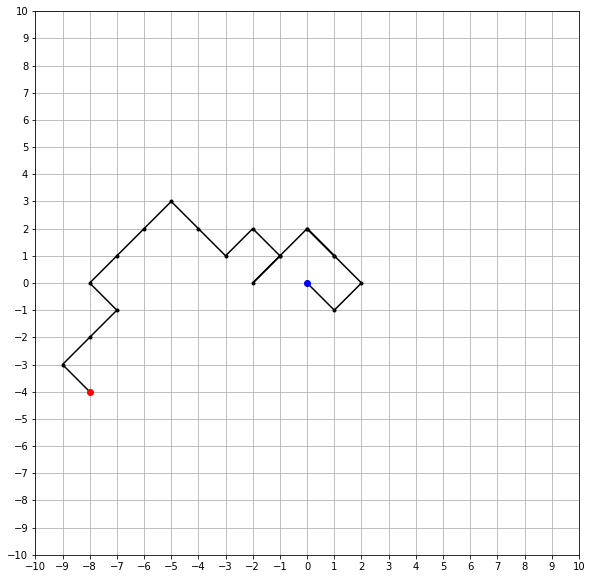

In [14]:
N = 20 #total number of steps

xpos = []
ypos = []

#starting position
x = 0
y = 0
xpos.append(x)
ypos.append(y)

for i in range(N):
    
    #step right or left
    r = rand.randint(0,1)
    if r == 0:
        x = x + 1 #step right
    else:
        x = x - 1 #step left
    
    #step up or down
    r = rand.randint(0,1)
    if r == 0:
        y = y + 1 #step up
    else:
        y = y - 1 #step down

    #store values of x and y
    xpos.append(x)
    ypos.append(y)

# plot path
gridsize = 10
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_aspect('equal')
ax.set_xticks(np.arange(-gridsize, gridsize+1, 1))
ax.set_yticks(np.arange(-gridsize, gridsize+1, 1))
plt.axis('square')
plt.xlim(-gridsize,gridsize)
plt.ylim(-gridsize,gridsize)
plt.grid()
plt.plot(xpos,ypos,'k.-')
plt.plot(0,0,'bo') #blue at starting position
plt.plot(x,y,'ro') #red at last position
plt.show()

## Create an Animation

In [15]:
filename='walk.mp4'
with animation(filename, dpi=30) as anim:
    t_offsets = np.arange(N)
    i=0
    for offset in tqdm(t_offsets):

        fig = plt.figure(figsize=(10,10))
        ax = fig.gca()
        ax.set_aspect('equal')
        ax.set_xticks(np.arange(-10, 11, 1))
        ax.set_yticks(np.arange(-10, 11, 1))
        plt.axis('square')
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        plt.grid()
        plt.plot(xpos[:i],ypos[:i],'k.-')
        plt.plot(0,0,'bo')
        if i>0:
            plt.plot(xpos[i-1],ypos[i-1],'ro')
        anim.add_frame(fig)
        plt.close(fig)
        i=i+1

100%|██████████| 20/20 [00:04<00:00,  4.83it/s]


In [16]:
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Calculate Distance

Use the Pythagorean theorem to calculate the distance of the final position from the starting position.

$$d = \sqrt{x^2+y^2}$$



In [19]:
d = np.sqrt(xpos[-1]**2+ypos[-1]**2)
print("Distance from starting position = {:.2f} grid units.".format(d))

Distance from starting position = 8.94 grid units.


## Using Python Functions

Use Python functions to:

1. do a random walk and return the x and y positions of the walk
2. repeat the random walk and calculate (and return) the average distance

Then, graph the average distance as a function of the number of steps.

In [27]:
def randomwalk(N): #N is number of steps; returns final position
    xpos = []
    ypos = []

    #starting position
    x = 0
    y = 0
    xpos.append(x)
    ypos.append(y)

    for i in range(N):

        #step right or left
        r = rand.randint(0,1)
        if r == 0:
            x = x + 1 #step right
        else:
            x = x - 1 #step left

        #step up or down
        r = rand.randint(0,1)
        if r == 0:
            y = y + 1 #step up
        else:
            y = y - 1 #step down

        #store values of x and y
        xpos.append(x)
        ypos.append(y)
    
    return (xpos,ypos)

def Nrandomwalks(Nwalks, Nsteps): #Nwalks of Nsteps are repeated; returns average distance
    
    darray = np.zeros(Nwalks)
    for i in range(Nwalks):
        (xpos,ypos) = randomwalk(Nsteps)
        d = np.sqrt(xpos[-1]**2+ypos[-1]**2)
        darray[i]=d
    
    dave = np.average(darray)
    return dave



[0, -1, 0] [0, 1, 2]


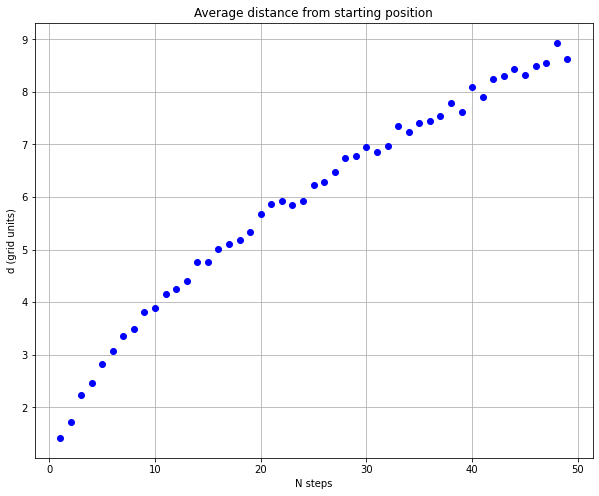

In [69]:
Nmodel = range(1,50) #number of steps in each experiment
dmodel = [] #store average distance
for n in Nmodel:
    d = Nrandomwalks(1000, n)
    dmodel.append(d)

plt.figure(figsize=(10,8))
plt.title("Average distance from starting position")
plt.xlabel("N steps")
plt.ylabel("d (grid units)")
plt.plot(Nmodel,dmodel,'bo')
plt.grid()
plt.show()

## Exercise 1

Do a curve fit to the arrays of data for `Nmodel` and `dmodel`. Find an emperical model for $d(N)$.